In [1]:
# # Install hdf5 library by interacting with the interpreter 
import sys
!{sys.executable} -m pip install hdf5storage
import hdf5storage
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from numpy import sqrt


import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor
import xgboost as xgb






In [2]:
LOB_input = hdf5storage.loadmat('S092215-v50-AMZN_OCT2_states.mat')
LOB_Amazon = pd.DataFrame.from_dict(LOB_input['LOB'])




In [3]:
# Add Column Titles
LOB_Amazon.columns = [
                      "Time", "Mid_Price", "Spread", 
                      "AskPrice1", "AskVolume1","BidPrice1", "BidVolume1", # Level 1
                      "AskPrice2", "AskVolume2","BidPrice2", "BidVolume2", # Level 2
                      "AskPrice3", "AskVolume3","BidPrice3", "BidVolume3", # Level 3
                      "AskPrice4", "AskVolume4","BidPrice4", "BidVolume4", # Level 4
                      "AskPrice5", "AskVolume5","BidPrice5", "BidVolume5", # Level 5
                      "AskPrice6", "AskVolume6","BidPrice6", "BidVolume6", # Level 6
                      "AskPrice7", "AskVolume7","BidPrice7", "BidVolume7", # Level 7
                      "AskPrice8", "AskVolume8","BidPrice8", "BidVolume8", # Level 8
                      "AskPrice9", "AskVolume9","BidPrice9", "BidVolume9", # Level 9
                      "AskPrice10", "AskVolume10","BidPrice10", "BidVolume10", # Level 10
                     ]

print(LOB_Amazon.shape)
LOB_Amazon_nonzero = LOB_Amazon.loc[
    (LOB_Amazon["Mid_Price"] != 0) &
    (LOB_Amazon["Spread"] != 0) &
    (LOB_Amazon["AskPrice1"] != 0) &
    (LOB_Amazon["AskVolume1"] != 0) &
    (LOB_Amazon["BidPrice1"] != 0) &
    (LOB_Amazon["BidVolume1"] != 0)
].copy()
LOB_Amazon_nonzero.shape

(562650, 43)


(559718, 43)

In [4]:

# Version 1.0
new_time_column = []
for item in LOB_Amazon_nonzero["Time"]:
    current_row = datetime.datetime.fromtimestamp(item/1000.0) #1000.0 since 1 sec = 1000 mls
    new_time_column.append(current_row)

# Version 2.0
readable_time = []
for i in range(0,len(new_time_column)):
    current_time = new_time_column[i].strftime("%H:%M:%f")
    readable_time.append(current_time)
    # Replace Unix time with the Readable Time Format (=Version 2.0)
    
# LOB_Amazon_nonzero['Time'] = readable_time 
LOB_Amazon_nonzero.loc[:, 'Time'] = readable_time



,Time,Mid_Price,Spread,AskPrice1,AskVolume1,BidPrice1,BidVolume1,AskPrice2,AskVolume2,BidPrice2,...,BidPrice8,BidVolume8,AskPrice9,AskVolume9,BidPrice9,BidVolume9,AskPrice10,AskVolume10,BidPrice10,BidVolume10
1,05:00:000000,5452100,49400,5476800,100,5427400,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,05:00:073000,5451900,49000,5476400,100,5427400,100,5476800,100,0,...,0,0,0,0,0,0,0,0,0,0
3,05:00:073000,5452000,48800,5476400,100,5427600,100,5476800,100,5427400,...,0,0,0,0,0,0,0,0,0,0
4,05:00:073000,5452000,48800,5476400,100,5427600,100,5476800,100,0,...,0,0,0,0,0,0,0,0,0,0
5,05:00:073000,5452000,48800,5476400,100,5427600,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# LOB_Amazon_Sample = LOB_Amazon.iloc[86000:562500,] # Time-framing

Feature_Matrix = LOB_Amazon_nonzero.iloc[5:,2:]

# Take a random sample of 10% of the datapoints
sample_size = int(0.1 * len(Feature_Matrix))
Feature_Matrix_sample = Feature_Matrix.sample(sample_size)

print(Feature_Matrix_sample.shape)

# Feature_Matrix_Sample = Feature_Matrix.iloc[7000:7030, 0:5] # 5 features.
Feature_Matrix_Sample1 = Feature_Matrix.iloc[7000:300000, 0:40] # 40 features.


(55971, 41)


,Spread,AskPrice1,AskVolume1,BidPrice1,BidVolume1,AskPrice2,AskVolume2,BidPrice2,BidVolume2,AskPrice3,...,BidPrice8,BidVolume8,AskPrice9,AskVolume9,BidPrice9,BidVolume9,AskPrice10,AskVolume10,BidPrice10,BidVolume10
6,48800,5476400,100,5427600,100,5484000,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,48600,5476200,100,5427600,100,5476400,100,0,0,5484000,...,0,0,0,0,0,0,0,0,0,0
8,48600,5476200,100,5427600,100,5484000,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,56400,5484000,100,5427600,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,56400,5484000,100,5427600,100,5484200,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Mid_Price_Series = LOB_Amazon_nonzero['Mid_Price'].iloc[4:] # series not matrix. start from 4 

# Extract Targets/Labels
Forecasting_Variable = Mid_Price_Series

print('Mid_Price_Series length:',len(Mid_Price_Series))
print('Feature_Matrix length:', len(Feature_Matrix))


Mid_Price_Series length: 559714
Feature_Matrix length: 559713


In [8]:
# Calculate Stock Returns for Label Preparation

# Returns 
returns = (Mid_Price_Series/ Mid_Price_Series.shift(1)) - 1

# Indexing (i.e., identify type fo diffrences)
idx_pos = returns[returns >= 0].index
idx_neg = returns[returns < 0].index

# Based on Indexing convert/label returns
returns.loc[idx_pos] = 1
returns.loc[idx_neg] = -1

# Remove NaN valeus
returns.dropna(inplace=True)





# Take a random sample of 10% of the datapoints
sample_size = int(0.1 * len(returns))
returns_sample = returns.sample(sample_size)





(559713,)
(55971,)


In [9]:
# Feature engineering



# Mid price weighted by order imbalance
LOB_Amazon_nonzero['MidPrice_OIB'] = 0
total_volume = 0

for level in range(1, 11):
    ask_price_col = f'AskPrice{level}'
    ask_volume_col = f'AskVolume{level}'
    bid_price_col = f'BidPrice{level}'
    bid_volume_col = f'BidVolume{level}'

    LOB_Amazon_nonzero['MidPrice_OIB'] += (
        LOB_Amazon_nonzero[bid_price_col] * LOB_Amazon_nonzero[ask_volume_col] +
        LOB_Amazon_nonzero[ask_price_col] * LOB_Amazon_nonzero[bid_volume_col]
    )
    total_volume += LOB_Amazon_nonzero[bid_volume_col] + LOB_Amazon_nonzero[ask_volume_col]

LOB_Amazon_nonzero['MidPrice_OIB'] /= total_volume




# Financial Duration. # Financial Duration. tells you of how much activity is occurring.

# Convert the 'Time' column back to datetime format from string format
LOB_Amazon_nonzero['Time'] = pd.to_datetime(LOB_Amazon_nonzero['Time'], format='%H:%M:%f')

# Calculate the difference in time between the current and previous order
LOB_Amazon_nonzero['Financial_Duration'] = LOB_Amazon_nonzero['Time'].diff()

# Convert time difference to seconds
LOB_Amazon_nonzero['Financial_Duration'] = LOB_Amazon_nonzero['Financial_Duration'].dt.total_seconds()




# Average mid-price financial duration
LOB_Amazon_nonzero['Mid_Price_Change'] = LOB_Amazon_nonzero['Mid_Price'].diff()

price_changes = LOB_Amazon_nonzero[LOB_Amazon_nonzero['Mid_Price_Change'] != 0]
average_mid_price_financial_duration = price_changes['Financial_Duration'].sum() / len(price_changes)






# Price Momentum
# Define the number of periods for momentum calculation
periods = 100

# Calculate momentum for the mid-price
LOB_Amazon_nonzero['Mid_Price_Momentum'] = LOB_Amazon_nonzero['Mid_Price'] - LOB_Amazon_nonzero['Mid_Price'].shift(periods)


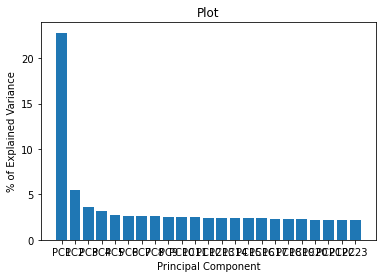

In [10]:
# Perform PCA 

scaled_data = preprocessing.scale(Feature_Matrix)

pca = PCA(n_components=0.80) # create a PCA object to preserve 95% of the variance (pushes it to 32 rather than 40)
pca.fit(scaled_data) # do the math for train set
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data for test set

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Plot')
plt.show()


In [11]:
# Let's define the feature and target variable
X = Feature_Matrix_sample
y = returns_sample

# First, let's split the data into training (50%) and the rest (50%)
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Now, let's split the intermediate data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_intermediate, y_intermediate, test_size=0.33, shuffle=False)

# The datasets are now split into train (50%), validation (25%), and test (25%) sets.
print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

# dictionary of all the different models.
regressors = {
    "Ridge": Ridge(alpha=1.0),
    "XGB": xgb.XGBRegressor(random_state = 0), 
    "SVR(rbf)": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "RFR": RandomForestRegressor(n_estimators=100, random_state=0),
    "SVR(polynomial)": SVR(kernel='poly', C=1.0, epsilon=0.1)
}

# Initialize variable to store the best RMSE and best model
best_rmse = float('inf')
best_model = None

# Train, predict and calculate RMSE for each model
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_val_pred = regressor.predict(X_val)
    rmse = sqrt(mean_squared_error(y_val, y_val_pred)) # Calculate RMSE

    print(f'{name} RMSE: {rmse}')
    
    # If this model is better than the previous best, update best_rmse and best_model
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = name

print(f'Best model: {best_model} with RMSE: {best_rmse}')

Training set: (28125, 41) (28125,)
Validation set: (13853, 41) (13853,)
Test set: (13993, 41) (13993,)
Ridge RMSE: 0.5223594396457582


/Users/joshuarees/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13644e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


XGB RMSE: 0.5400594372748467
SVR(rbf) RMSE: 0.5239604985056517
RFR RMSE: 0.5618432053222956
SVR(polynomial) RMSE: 0.5240811618214216
Best model: Ridge with RMSE: 0.5223594396457582


In [12]:
# Model selection and results

# Let's define the feature and target variable
X = Feature_Matrix_sample
y = returns_sample

# First, let's split the data into training (50%) and the rest (50%)
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state = 0)

# Now, let's split the intermediate data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_intermediate, y_intermediate, test_size=0.33, shuffle=False, random_state = 0)

# The datasets are now split into train (50%), validation (25%), and test (25%) sets.
print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

# dictionary of all the different models.
regressors = {
    "Ridge": Ridge(alpha=1.0),
    "XGB": xgb.XGBRegressor(random_state = 0), 
    "SVR_rbf": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "RFR": RandomForestRegressor(n_estimators=100, random_state=0),
    "SVR_polynomial": SVR(kernel='poly', C=1.0, epsilon=0.1)
}

# Initialize variable to store the best MAE and best model
best_mae = float('inf')
best_model = None

# Train, predict and calculate MAE for each model
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_val_pred = regressor.predict(X_val)
    mae = mean_absolute_error(y_val, y_val_pred) # Calculate MAE

    print(f'{name} MAE: {mae}')
    
    # If this model is better than the previous best, update best_mae and best_model
    if mae < best_mae:
        best_mae = mae
        best_model = name

print(f'Best model: {best_model} with MAE: {best_mae}')

Training set: (28125, 41) (28125,)
Validation set: (13853, 41) (13853,)
Test set: (13993, 41) (13993,)
Ridge MAE: 0.2780888147019722


/Users/joshuarees/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13644e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


XGB MAE: 0.2809636882278602
SVR_rbf MAE: 0.23241064595771418
RFR MAE: 0.30032250041639946
SVR_polynomial MAE: 0.2321194822388064
Best model: SVR_polynomial with MAE: 0.2321194822388064
